In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [2]:
#res = pd.read_csv("../../Results/Ising_Frustrated/Classical/res_1000x1000_10err.gzip", compression='gzip')
res = pd.read_csv("../../Results/Ising_Frustrated/Classical/res_wall_100x100_10err.gzip", compression='gzip')

In [3]:
res.rename(columns={"U": "B"}, inplace=True)

In [4]:
res_dw = pd.read_csv("../../Results/Ising_Frustrated/DWave/res_100.csv")

In [5]:
ratios = res["ratio"].unique()
Ts = res["T"].unique()
N = len(ratios)

In [6]:
mins = []
Best_T = []
Best_R2 = []
for j, var in enumerate(["M", "B", "W"]):
    MAE = np.zeros(Ts.shape)
    R2 = np.zeros(Ts.shape)
    MSE = np.zeros(Ts.shape)
    for i, T in enumerate(Ts):
        M_th = res.loc[res["T"] == T, var].to_numpy()
        R2[i] = r2_score(M_th, res_dw[var])
    
    Best_T.append(Ts[np.argmax(R2)])
    Best_R2.append(np.max(R2))
    mins.append(np.argmax(R2))
    print(var, np.argmin(MAE), np.argmax(R2), np.argmin(MSE))

M 0 29 0
B 0 31 0
W 0 29 0


In [7]:
Best_T, Best_R2

([1.095959595959596, 1.1646464646464647, 1.095959595959596],
 [0.9684813254742087, 0.04815629753875672, 0.9879093070021961])

In [8]:
width = 5.949973986 # in inches
ratio = (np.sqrt(5.0) - 1.0) / 2.0

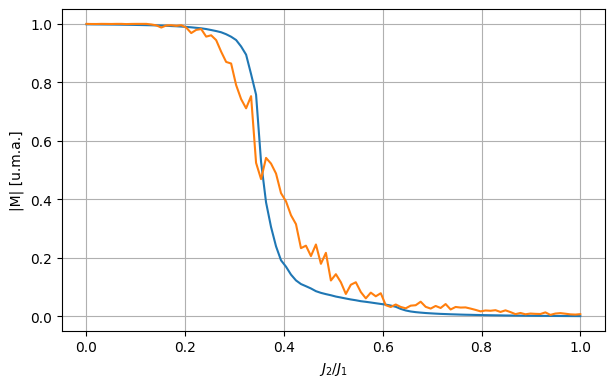

In [9]:
fig = plt.figure(figsize=(width, width * ratio))
fig.set_tight_layout({'pad': 0})

plt.plot(ratios, res.loc[res["T"] == Ts[mins[0]], "M"])
plt.plot(ratios, res_dw["M"])
plt.xlabel(r'$J_2$/$J_1$')
plt.ylabel("|M| [u.m.a.]")
plt.grid()

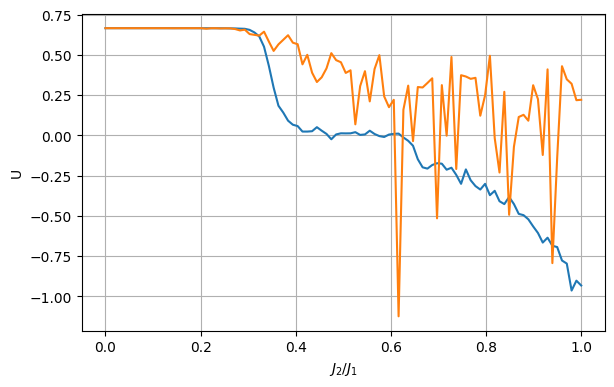

In [10]:
fig = plt.figure(figsize=(width, width * ratio))
fig.set_tight_layout({'pad': 0})

plt.plot(ratios, res.loc[res["T"] == Ts[mins[1]], "B"])
plt.plot(ratios, res_dw["B"])
plt.xlabel(r'$J_2$/$J_1$')
plt.ylabel("U")
plt.grid()

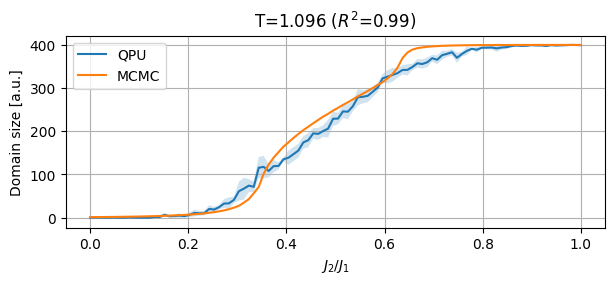

In [19]:
fig = plt.figure(figsize=(width, 0.7* width * ratio))
fig.set_tight_layout({'pad': 0})

plt.fill_between(ratios, res_dw["W"] - res_dw["W_std"], res_dw["W"] + res_dw["W_std"], alpha=0.2)
plt.plot(ratios, res_dw["W"], label="QPU")
plt.plot(ratios, res.loc[res["T"] == Ts[mins[2]], "W"], label="MCMC")
plt.xlabel(r'$J_2$/$J_1$')
plt.ylabel("Domain size [a.u.]")
plt.title(fr"T={Ts[mins[2]]:0.3f} ($R^2$={Best_R2[2]:0.2f})")
plt.grid()
plt.legend()
plt.savefig("../../Images/Ising_Frustrated/fit_W.pdf", bbox_inches="tight")

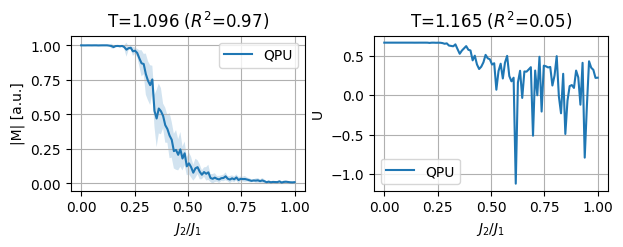

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(width, 0.6* width * ratio))
fig.set_tight_layout({'pad': 0})


ax[0].fill_between(ratios, res_dw["M"] - res_dw["M_std"], res_dw["M"] + res_dw["M_std"], alpha=0.2)
ax[0].plot(ratios, res_dw["M"], label="QPU")
ax[0].plot(ratios, res.loc[res["T"] == Ts[mins[0]], "M"], label="MCMC")
ax[0].grid()
ax[0].legend()
ax[0].set_title(fr"T={Ts[mins[0]]:0.3f} ($R^2$={Best_R2[0]:0.2f})")
ax[0].set_xlabel(r'$J_2$/$J_1$')
ax[0].set_ylabel("|M| [a.u.]")


ax[1].fill_between(ratios, res_dw["B"] - res_dw["B_std"], res_dw["B"] + res_dw["B_std"], alpha=0.2)
ax[1].plot(ratios, res_dw["B"], label="QPU")
ax[1].plot(ratios, res.loc[res["T"] == Ts[mins[1]], "B"], label="MCMC")
ax[1].grid()
ax[1].legend()
ax[1].set_title(fr"T={Ts[mins[1]]:0.3f} ($R^2$={Best_R2[1]:0.2f})")
ax[1].set_xlabel(r'$J_2$/$J_1$')
ax[1].set_ylabel(r"U")
#plt.savefig("../../Images/Ising_Frustrated/fit_M_B.pdf", bbox_inches="tight")

In [13]:
B_matrix = np.zeros((N, N))

for i, T in enumerate(Ts):
    B_matrix[i, :] = res[res['T'] == T]['B']
    
M_matrix = np.zeros((N, N))

for i, T in enumerate(Ts):
    M_matrix[i, :] = res[res['T'] == T]['M']
    
W_matrix = np.zeros((N, N))

for i, T in enumerate(Ts):
    W_matrix[i, :] = res[res['T'] == T]['W']

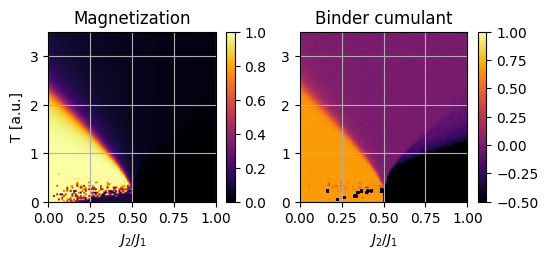

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(width, 0.6*width * ratio), gridspec_kw={'wspace': 0.2})

img0 = ax[0].imshow(M_matrix[::-1, :], extent=[0,1,0,3.5], aspect='auto', cmap='inferno')#
ax[0].set_xlabel(r'$J_2$/$J_1$')
ax[0].set_ylabel("T [a.u.]")
ax[0].set_title("Magnetization")
ax[0].grid()
fig.colorbar(img0)

img1 = ax[1].imshow(B_matrix[::-1, :], vmax=1, vmin=-0.5, extent=[0,1,0,3.5], aspect='auto', cmap='inferno')#
ax[1].set_xlabel(r'$J_2$/$J_1$')
ax[1].set_title("Binder cumulant")
ax[1].grid()
fig.colorbar(img1)
plt.savefig("../../Images/Ising_Frustrated/Phase_Diagrams_M_B.pdf",bbox_inches='tight')

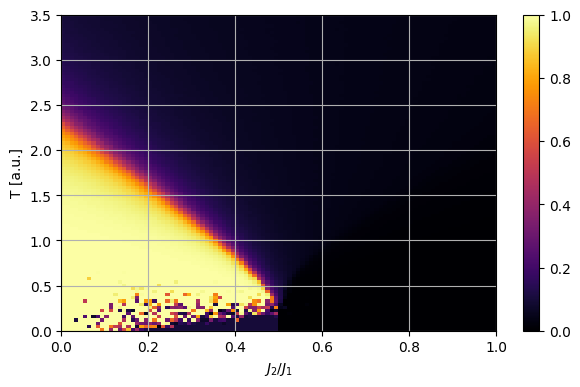

In [15]:
fig, ax = plt.subplots(figsize=(width, width * ratio))
fig.set_tight_layout({'pad': 0})

img = ax.imshow(M_matrix[::-1, :], extent=[0,1,0,3.5], aspect='auto', cmap='inferno')#
ax.set_xlabel(r'$J_2$/$J_1$')
ax.set_ylabel("T [a.u.]")
ax.grid()
fig.colorbar(img)
plt.savefig("../../Images/Ising_Frustrated/Phase_Diagram_M.pdf")

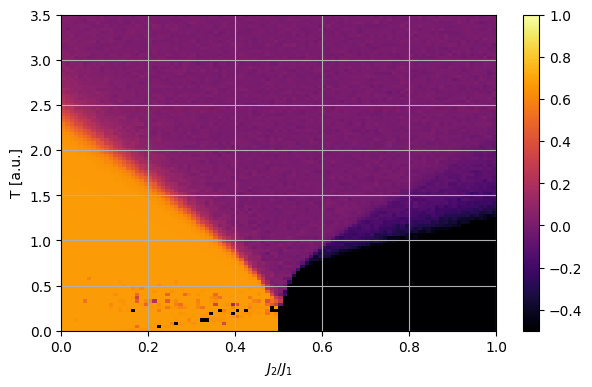

In [16]:
fig, ax = plt.subplots(figsize=(width, width * ratio))
fig.set_tight_layout({'pad': 0})

img = ax.imshow(B_matrix[::-1, :], vmax=1, vmin=-0.5, extent=[0,1,0,3.5], aspect='auto', cmap='inferno')#
ax.set_xlabel(r'$J_2$/$J_1$')
ax.set_ylabel("T [a.u.]")
ax.grid()
fig.colorbar(img)
plt.savefig("../../Images/Ising_Frustrated/Phase_Diagram_B.pdf")

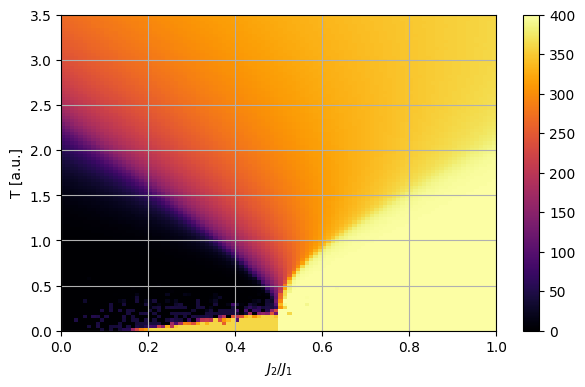

In [17]:
fig, ax = plt.subplots(figsize=(width, width * ratio))
fig.set_tight_layout({'pad': 0})

img = ax.imshow(W_matrix[::-1, :], extent=[0,1,0,3.5], aspect='auto', cmap='inferno')#
ax.set_xlabel(r'$J_2$/$J_1$')
ax.set_ylabel("T [a.u.]")
ax.grid()
fig.colorbar(img)
plt.savefig("../../Images/Ising_Frustrated/Phase_Diagram_W.pdf")